# Load and visualize data

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

#### ImageNet label map

In [2]:
label_map = np.load('./data/imagenet_label_map.npy', allow_pickle=True).item()
label_to_wnid = np.load('./data/imagenet_label_to_wnid.npy', allow_pickle=True).item()

### ImageNet superclasses

In [3]:
superclasses = np.load('./data/superclasses.npy', allow_pickle=True).item()

for k, v in superclasses.items():
    print(f"{k}, #ImageNet classes: {len(v)}, Sample classes: {v[:5]}")

Dogs, #ImageNet classes: 130, Sample classes: [151, 152, 153, 154, 155]
Other mammals, #ImageNet classes: 88, Sample classes: [286, 287, 288, 289, 290]
Birds, #ImageNet classes: 59, Sample classes: [128, 129, 130, 131, 132]
Reptiles, fish, amphibians, #ImageNet classes: 60, Sample classes: [33, 34, 35, 36, 37]
inverterbrates, #ImageNet classes: 61, Sample classes: [300, 301, 302, 303, 304]
Food, plants, fungi, #ImageNet classes: 63, Sample classes: [992, 993, 994, 995, 996]
Devices, #ImageNet classes: 172, Sample classes: [513, 517, 527, 530, 531]
Structures, furnishing, #ImageNet classes: 90, Sample classes: [516, 648, 520, 526, 532]
Clothes, covering, #ImageNet classes: 92, Sample classes: [643, 515, 518, 775, 903]
Implements, containers, misc. objects, #ImageNet classes: 117, Sample classes: [512, 644, 521, 523, 909]
vehicles, #ImageNet classes: 68, Sample classes: [779, 780, 654, 913, 914]


## Model predictions

The dataframe contains the following information:

____________________________________________________________________________________________________

`image_number`: number of image as per an unshuffled loader

`imagenet_label`: ImageNet label

____________________________________________________________________________________________________

`pred_{MODEL_NAME}`: Top-5 predictions of model

`top1_{MODEL_NAME}`: True if label == Top-1 model prediction

`top5_{MODEL_NAME}`: True if label is in Top-5 model predictions

In [4]:
model_preds = pd.read_pickle("./data/model_predictions.pkl")

In [5]:
model_preds

,img_number,imagenet_label,pred_googlenet,pred_alexnet,pred_resnet50,pred_resnet101,pred_inception_v3,pred_vgg16,pred_wide_resnet50_2,pred_densenet161,...,top5_googlenet,top5_alexnet,top5_resnet50,top5_resnet101,top5_inception_v3,top5_vgg16,top5_wide_resnet50_2,top5_densenet161,top5_mobilenet_v2,top5_tf_efficientnet_b7
0,0,0,"[48, 39, 0, 391, 394]","[395, 0, 48, 390, 394]","[394, 0, 395, 391, 389]","[394, 0, 149, 395, 391]","[0, 394, 48, 36, 391]","[395, 394, 391, 48, 39]","[394, 391, 0, 389, 390]","[394, 0, 391, 48, 389]",...,True,True,True,True,True,False,True,True,True,True
1,1,0,"[0, 391, 122, 766, 389]","[764, 763, 413, 758, 391]","[0, 389, 391, 395, 758]","[0, 389, 391, 758, 394]","[391, 0, 758, 389, 764]","[0, 391, 758, 389, 395]","[0, 758, 391, 389, 395]","[0, 391, 389, 758, 395]",...,True,False,True,True,True,True,True,True,True,True
2,2,0,"[0, 391, 346, 693, 223]","[929, 472, 444, 870, 655]","[0, 391, 693, 389, 390]","[0, 693, 758, 391, 472]","[837, 703, 419, 836, 785]","[0, 758, 391, 223, 237]","[0, 693, 391, 472, 389]","[0, 391, 395, 693, 472]",...,True,False,True,True,False,True,True,True,True,True
3,3,0,"[0, 391, 389, 394, 395]","[0, 389, 395, 36, 955]","[0, 389, 391, 395, 394]","[0, 389, 391, 758, 997]","[0, 391, 122, 955, 933]","[0, 389, 30, 758, 390]","[0, 389, 395, 955, 36]","[0, 389, 391, 394, 397]",...,True,True,True,True,True,True,True,True,True,True
4,4,0,"[0, 391, 1, 389, 556]","[0, 389, 114, 390, 939]","[0, 389, 391, 758, 955]","[0, 955, 389, 382, 1]","[0, 389, 37, 265, 5]","[0, 389, 758, 391, 390]","[0, 389, 758, 391, 395]","[0, 389, 904, 955, 391]",...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,999,"[896, 799, 435, 876, 706]","[799, 905, 876, 435, 831]","[896, 905, 904, 435, 799]","[896, 876, 435, 804, 861]","[876, 435, 579, 532, 526]","[799, 896, 435, 876, 904]","[999, 700, 904, 896, 861]","[896, 700, 435, 876, 904]",...,False,False,False,False,False,False,True,False,False,True
49996,49996,999,"[999, 700, 868, 861, 435]","[725, 504, 876, 666, 896]","[999, 700, 876, 435, 868]","[700, 999, 599, 876, 934]","[700, 999, 896, 435, 731]","[999, 700, 861, 896, 868]","[999, 876, 896, 435, 804]","[999, 700, 868, 876, 965]",...,True,False,True,True,True,True,True,True,True,True
49997,49997,999,"[762, 532, 495, 896, 857]","[470, 857, 532, 854, 406]","[854, 406, 851, 492, 762]","[521, 505, 968, 899, 859]","[857, 854, 406, 498, 762]","[406, 745, 762, 470, 896]","[495, 532, 725, 505, 968]","[406, 982, 607, 470, 846]",...,False,False,False,False,False,False,False,False,False,True
49998,49998,999,"[333, 937, 700, 330, 999]","[333, 937, 356, 359, 334]","[333, 700, 937, 338, 356]","[333, 700, 999, 937, 794]","[333, 937, 700, 338, 999]","[333, 937, 987, 338, 357]","[333, 937, 961, 700, 338]","[333, 700, 999, 728, 937]",...,True,False,False,True,True,False,False,True,False,False


## CONTAINS task with multiple labels/image

The dataframe contains the following information:

____________________________________________________________________________________________________

`image`: image filename 

`image_number`: number of image as per an unshuffled loader (same as above)

`imagenet_label`: ImageNet label

____________________________________________________________________________________________________

`query`: set of candidate labels queried in "contains" experiment

`num_queries`: size of `query` set

____________________________________________________________________________________________________

`selected`: number of annotators that selected each query label

`total`: number of annotators that saw each query label (some HITs were discarded as part of quality control)

`sel_dict`: dictionary mapping query label to tuple with number of workers that selected the image-query pair, and the number of workers that it was presented to 

In [6]:
info_contains = pd.read_pickle("./data/annotations_contains_task.pkl")

In [7]:
info_contains

,Unnamed: 0,query,selected,total,image_number,imagenet_label,num_queries,sel_dict
image,,,,,,,,
ILSVRC2012_val_00047683.JPEG,90113,"[392, 310, 322, 712, 321, 325, 946, 309, 326, ...","[0, 0, 4, 0, 4, 7, 1, 0, 6, 1, 4, 0]","[9, 9, 9, 7, 5, 8, 9, 9, 7, 9, 9, 9]",16296,325,12,"{392: (0, 9), 310: (0, 9), 322: (4, 9), 712: (..."
ILSVRC2012_val_00030990.JPEG,46639,"[312, 30, 39, 31, 149, 46, 40, 47, 42, 55, 401]","[0, 0, 8, 0, 1, 3, 4, 7, 2, 1, 0]","[7, 9, 8, 8, 8, 7, 8, 8, 4, 9, 8]",2382,47,11,"{312: (0, 7), 30: (0, 9), 39: (8, 8), 31: (0, ..."
ILSVRC2012_val_00002431.JPEG,67588,"[870, 444, 670, 826, 778, 685, 63, 880, 597, 4...","[1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 7, 1, 0, 0, ...","[9, 9, 8, 9, 8, 9, 7, 8, 9, 8, 9, 9, 7, 9, 9, ...",35201,704,17,"{870: (1, 9), 444: (0, 9), 670: (0, 8), 826: (..."
ILSVRC2012_val_00033061.JPEG,125421,"[497, 442, 448, 494, 884, 698, 406, 425, 663, ...","[6, 8, 0, 4, 0, 0, 1, 1, 4, 1, 1]","[6, 8, 9, 9, 8, 7, 8, 9, 6, 8, 9]",22133,442,11,"{497: (6, 6), 442: (8, 8), 448: (0, 9), 494: (..."
ILSVRC2012_val_00002735.JPEG,126066,"[497, 442, 884, 698, 399, 668, 832, 663, 538]","[6, 3, 4, 4, 0, 6, 6, 5, 8]","[8, 8, 8, 9, 8, 7, 8, 8, 9]",33403,668,9,"{497: (6, 8), 442: (3, 8), 884: (4, 8), 698: (..."
...,...,...,...,...,...,...,...,...
ILSVRC2012_val_00003714.JPEG,143137,"[214, 177, 170, 231, 236, 264, 224, 205, 240, ...","[3, 1, 2, 1, 2, 1, 1, 2, 4, 1, 1, 1, 1, 1, 0, ...","[9, 6, 8, 9, 8, 6, 5, 8, 8, 8, 8, 7, 9, 8, 8, ...",10702,214,19,"{214: (3, 9), 177: (1, 6), 170: (2, 8), 231: (..."
ILSVRC2012_val_00018015.JPEG,54180,"[843, 671, 892, 871, 814, 826, 778, 915, 880, ...","[0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...","[9, 9, 9, 8, 9, 9, 5, 8, 9, 8, 7, 5, 9, 6, 9, ...",33564,671,23,"{843: (0, 9), 671: (2, 9), 892: (1, 9), 871: (..."
ILSVRC2012_val_00029538.JPEG,129790,"[610, 714, 566, 745, 771, 515, 592, 650, 420, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 8, 0, 0]","[9, 9, 9, 8, 6, 9, 9, 8, 9, 8, 8, 8, 9]",20129,402,13,"{610: (0, 9), 714: (0, 9), 566: (0, 9), 745: (..."


## Split of 10k images used for CONTAINS task

____________________________________________________________________________________________________

`image`: image filename 

`annotation`: Can take one of the following 4 values

(a) `easy`: ImageNet label was the only label selected confidently in the ``valid labels`` expt (no other label has even half ImageNet label sf as per at least 5 workers)

(b) `mis`: ImageNet label was not selected by any annotators

(c) `fu`: Images were part of the follow-up experiment due to multiple confident labels

(a) `amb`: Images omitted from follow-up because number of workers was too low (HITs discarded during controls)

In [8]:
info_part = pd.read_pickle("./data/image_info.pkl")

In [9]:
info_part

,annotation
image,
ILSVRC2012_val_00047683.JPEG,fu
ILSVRC2012_val_00030990.JPEG,fu
ILSVRC2012_val_00002431.JPEG,easy
ILSVRC2012_val_00033061.JPEG,fu
ILSVRC2012_val_00002735.JPEG,fu
...,...
ILSVRC2012_val_00003714.JPEG,fu
ILSVRC2012_val_00018015.JPEG,fu
ILSVRC2012_val_00029538.JPEG,easy


## Image Classification (CLASSIFY task)

The dataframe contains the following information:

____________________________________________________________________________________________________

`image`: image filename 

`image_number`: number of image as per an unshuffled loader (same as above)

`imagenet_label`: ImageNet label

____________________________________________________________________________________________________

`main`: class for main object in the image, 1 per annotator

`main_top`: ``main label`` (most frequent entry of ``main``)

`main_counter`: counter with distribution over label of main object (based on ``main``)

____________________________________________________________________________________________________

`selected`: set of labels (corresponding to distinct objects) selected by each annotator

`num_objects`: number of objects in image (argmax over length of `selected`)

`object_counter`: distribution over number of objects in image (distribution over length of `selected`)

`objects`: list of labels for each of the objects in image (total=`num_objects`) obtained by applying max-k cut on `selected`

`main_object`: object containing `main_top`

`main_object_counter`: how likely each object is to be `main`

`imagenet_object`: object corresponding to ImageNet label

In [10]:
info_classify = pd.read_pickle("./data/annotations_classify_task.pkl")

In [11]:
info_classify

,main,selected,num_workers,image_number,imagenet_label,main_counter,main_top,num_objects,object_counter,objects,main_object,main_object_counter,imagenet_object
image,,,,,,,,,,,,,
ILSVRC2012_val_00047683.JPEG,"[325, 322, 322, 325, 322, 322, 325, 324, 322]","[[326, 322, 325], [322], [322], [325], [322], ...",9,16296,325,"{325: 3, 322: 5, 324: 1}",322,1,"{3: 1, 1: 8}","[{326: (0.09090909090909091, 0.111111111111111...",0,[9],0.0
ILSVRC2012_val_00030990.JPEG,"[40, 47, 39, 47, 47, 40, 47, 40, 47]","[[40], [47], [39], [47], [47], [40], [47], [40...",9,2382,47,"{40: 3, 47: 5, 39: 1}",47,1,"{1: 7, 2: 2}","[{40: (0.36363636363636365, 0.4444444444444444...",0,[9],0.0
ILSVRC2012_val_00033061.JPEG,"[497, 663, 497, 442, 497, 497, 497, 497, 497]","[[497, 442], [497, 442, 663], [497, 442], [442...",9,22133,442,"{497: 7, 663: 1, 442: 1}",497,2,"{2: 3, 3: 3, 1: 3}","[{442: (1.0, 0.7777777777777778)}, {497: (0.72...",1,"[1, 8]",0.0
ILSVRC2012_val_00002735.JPEG,"[497, 832, 663, 668, 832, 668, 538, 668, 668]","[[538, 497], [832, 538, 668, 663, 884, 497], [...",9,33403,668,"{497: 1, 832: 2, 663: 1, 668: 4, 538: 1}",668,2,"{2: 3, 6: 1, 4: 3, 1: 2}","[{884: (0.15384615384615385, 0.222222222222222...",1,"[2, 7]",1.0
ILSVRC2012_val_00019033.JPEG,"[69, 69, 69, 69, 116, 116, 69, 116, 126]","[[69], [69], [69], [69], [116], [69, 126, 116]...",9,5818,116,"{69: 5, 116: 3, 126: 1}",69,1,"{1: 7, 3: 2}","[{69: (0.46153846153846156, 0.6666666666666666...",0,[9],0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ILSVRC2012_val_00025813.JPEG,"[947, 947, 947, 947, 947, 947, 947, 947, 947]","[[997, 947], [997, 947], [947], [947], [997, 9...",9,47377,947,{947: 9},947,1,"{2: 4, 1: 5}","[{997: (0.3076923076923077, 0.4444444444444444...",0,[9],0.0
ILSVRC2012_val_00040269.JPEG,"[382, 381, 381, 382, 382, 382, 382, 382, 382]","[[382], [381], [381], [382], [382], [382], [38...",9,19041,380,"{382: 7, 381: 2}",382,1,"{1: 8, 2: 1}","[{382: (0.7, 0.7777777777777778), 381: (0.3, 0...",0,[9],NaN
ILSVRC2012_val_00003714.JPEG,"[214, 256, 240, 214, 256, 214, 205, 214, 214]","[[214, 240, 256, 236], [256], [240], [214, 256...",9,10702,214,"{214: 5, 256: 2, 240: 1, 205: 1}",214,1,"{4: 1, 1: 7, 2: 1}","[{214: (0.38461538461538464, 0.555555555555555...",0,[9],0.0


### Visualize fine-grained image annotations

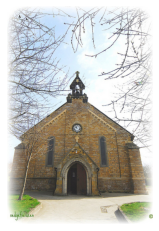

ImageNet label: bell cote, bell cot  

---------------

# Objects: 2
Main label: church, church building

Objects:
church, church building
bell cote, bell cot


In [12]:
IMAGENET_PATH = '/scratch/datasets/imagenet-pytorch/val'

vis_idx = 2

img, label = info_classify.index[vis_idx], info_classify.iloc[vis_idx]['imagenet_label']
image_path = f"{IMAGENET_PATH}/{label_to_wnid[label]}/{img}"
annotations = {k: info_classify.iloc[vis_idx][k] for k in ['main_top', 'num_objects', 'objects']}
objects = set([sorted((-v[0], k) for k, v in o.items())[0][1] for o in annotations['objects']])

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


print(f"ImageNet label: {label_map[label]}  \n")
print(f"---------------\n")
print(f"# Objects: {annotations['num_objects']}")
print(f"Main label: {label_map[annotations['main_top']]}\n")
print("Objects:")
for oi, o in enumerate(objects):
    print(f"{label_map[o]}")
